In [1]:
from nltk.corpus import machado
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
import string

from collections import defaultdict
from nltk.stem.snowball import PortugueseStemmer
import nltk
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### vamos importar os textos

In [2]:
textos = [machado.raw(id) for id in machado.fileids()]
tok_textos = [WordPunctTokenizer().tokenize(t.lower()) for t in textos]
T = nltk.TextCollection(tok_textos)

In [3]:
q = "juiz medo homem"
qt = WordPunctTokenizer().tokenize(q.lower())

# Exercício 1: Similaridade por Cosseno.

vamos criar uma matriz pra cada tipo de vetorização.

In [5]:
tfidf_matrix = np.zeros((len(tok_textos),len(qt)))
tf_matrix = np.zeros((len(tok_textos),len(qt)))
bi_matrix = np.zeros((len(tok_textos),len(qt)))

In [6]:
for j,w in enumerate(qt):
    for i, d in enumerate(tok_textos):
        tfidf_matrix[i,j] = T.tf_idf(w,d)
        tf_matrix[i,j] = T.tf(w,d)
        if tf_matrix[i,j] > 0:
            bi_matrix[i,j] = 1

agora vamos normalizar nossas matrizes dividindo elas pela norma L2

In [7]:
from numpy.linalg import norm
MN_tfidf = np.array([r/norm(r) if norm(r) !=0 else np.zeros(len(r)) for r in tfidf_matrix])
MN_tf = np.array([r/norm(r) if norm(r) !=0 else np.zeros(len(r)) for r in tf_matrix])
MN_bi = np.array([r/norm(r) if norm(r) !=0 else np.zeros(len(r)) for r in bi_matrix])
def ordem(q,MN):
    return [np.dot(q,r) for r in MN]

In [15]:
qv_tfidf = np.array([T.tf_idf(w,qt) for w in qt])
qv_tfidf /= norm(qv_tfidf)
r_tfidf = ordem(qv_tfidf,MN_tfidf)

qv_tf = np.array([T.tf(w,qt) for w in qt])
qv_tf /= norm(qv_tf)
r_tf = ordem(qv_tf,MN_tf)

qv_bi = np.ones(len(qt))
qv_bi /= norm(qv_bi)
r_bi = ordem(qv_bi,MN_bi)

In [16]:
vbi = filter(lambda x : x[0]!=0.0, zip(r_bi,range(len(tok_textos))))
vtf = filter(lambda x : x[0]!=0.0, zip(r_tf,range(len(tok_textos))))
vtfidf = filter(lambda x : x[0]!=0.0, zip(r_tfidf,range(len(tok_textos))))

In [18]:
resposta_bi = sorted(vbi, reverse=True)
resposta_tf = sorted(vtf, reverse=True)
resposta_tfidf = sorted(vtfidf, reverse=True) 

In [21]:
resposta_bi

[(1.0000000000000002, 245),
 (1.0000000000000002, 244),
 (1.0000000000000002, 243),
 (1.0000000000000002, 235),
 (1.0000000000000002, 232),
 (1.0000000000000002, 231),
 (1.0000000000000002, 229),
 (1.0000000000000002, 227),
 (1.0000000000000002, 226),
 (1.0000000000000002, 225),
 (1.0000000000000002, 223),
 (1.0000000000000002, 221),
 (1.0000000000000002, 219),
 (1.0000000000000002, 217),
 (1.0000000000000002, 193),
 (1.0000000000000002, 191),
 (1.0000000000000002, 190),
 (1.0000000000000002, 188),
 (1.0000000000000002, 185),
 (1.0000000000000002, 183),
 (1.0000000000000002, 182),
 (1.0000000000000002, 138),
 (1.0000000000000002, 118),
 (1.0000000000000002, 69),
 (1.0000000000000002, 51),
 (1.0000000000000002, 45),
 (1.0000000000000002, 9),
 (1.0000000000000002, 6),
 (1.0000000000000002, 4),
 (1.0000000000000002, 3),
 (1.0000000000000002, 2),
 (1.0000000000000002, 1),
 (1.0000000000000002, 0),
 (0.816496580927726, 241),
 (0.816496580927726, 240),
 (0.816496580927726, 238),
 (0.81649658

In [22]:
resposta_tf

[(1.0, 138),
 (0.9428090415820635, 118),
 (0.881917103688197, 9),
 (0.8819171036881968, 221),
 (0.8798826901281197, 217),
 (0.8673359443511277, 245),
 (0.8318837370406581, 4),
 (0.8268106308031118, 243),
 (0.8164965809277261, 234),
 (0.816496580927726, 241),
 (0.816496580927726, 160),
 (0.816496580927726, 108),
 (0.816496580927726, 80),
 (0.8164965809277259, 136),
 (0.8164965809277259, 109),
 (0.8164965809277259, 37),
 (0.808290376865476, 148),
 (0.8065050839582169, 65),
 (0.8006407690254357, 52),
 (0.8006407690254356, 240),
 (0.8006407690254356, 163),
 (0.7978611601063543, 228),
 (0.7978611601063542, 57),
 (0.787726361443376, 98),
 (0.7770286898858112, 219),
 (0.7745966692414834, 213),
 (0.7745966692414834, 124),
 (0.7745966692414834, 83),
 (0.7745966692414834, 21),
 (0.7745966692414833, 100),
 (0.7745966692414833, 95),
 (0.7745966692414833, 92),
 (0.7745966692414833, 76),
 (0.7745966692414833, 36),
 (0.7745966692414833, 34),
 (0.7504787743864563, 113),
 (0.7504787743864563, 71),
 (0.

In [23]:
resposta_tfidf

[(0.9999999999999999, 138),
 (0.9973720035920748, 118),
 (0.9715691075334945, 9),
 (0.9374358969361772, 221),
 (0.9128287346390687, 232),
 (0.9080464465568062, 235),
 (0.9080464465568062, 45),
 (0.8937930238803392, 1),
 (0.8882566841080078, 160),
 (0.8879252720124841, 148),
 (0.8865921077200981, 98),
 (0.8863233132569831, 61),
 (0.8858687431894112, 94),
 (0.8853137958082364, 34),
 (0.8852331077770472, 89),
 (0.88171970392614, 113),
 (0.87680963064746, 81),
 (0.8759790031046328, 191),
 (0.8724257572834092, 69),
 (0.8706765832303939, 87),
 (0.8634244564892668, 112),
 (0.8598168987525205, 219),
 (0.8581636576802728, 51),
 (0.8551645441858555, 151),
 (0.8473150384750849, 243),
 (0.8460121757734791, 105),
 (0.8288658408881631, 245),
 (0.8254934628584267, 49),
 (0.8081383995340231, 4),
 (0.8027647882741504, 46),
 (0.8027647882741503, 67),
 (0.7907412616818688, 6),
 (0.7720008927288564, 183),
 (0.7642220599296854, 2),
 (0.7482240275803975, 217),
 (0.7302520246336711, 225),
 (0.724623808247553

### Podemos ver que a similaridade da nossa consulta com relacão a cada um dos textos do machado são bem distintos. 

##### Mas isso não significa que elas se comportam totalmente diferetes. Peguemos o texto 138, por exemplo, a similaridade dele é a maxima em todas as matrizes. Assim como o texto 7 tem baixa, mas não nula, similaridade em todas as matrizes.

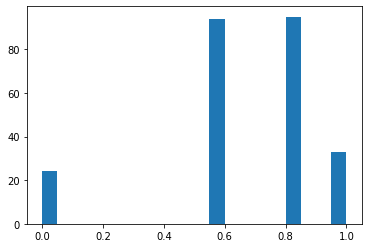

In [143]:
plt.hist(r_bi, bins = 20)
plt.show()

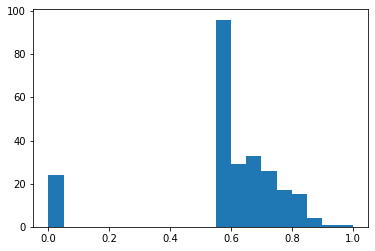

In [144]:
plt.hist(r_tf,bins = 20)
plt.show()

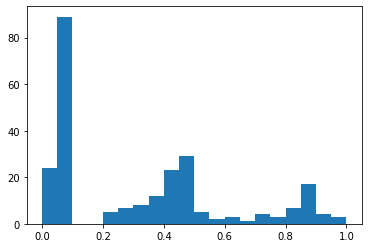

In [145]:
plt.hist(r_tfidf,bins = 20)
plt.show()

# Exercício 2: Explorando o conceito de similaridade.

In [50]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer

#### a ideia por é contruir uma matriz com todas as possiveis combinação de produto interno entre os vetores. Para isso basta multiplicas a matriz por sua transposta.

In [31]:
vectorizer = CountVectorizer()

In [44]:
transformed_data = vectorizer.fit_transform(textos)
transformed_data = normalize(transformed_data)

In [45]:
sim = (transformed_data * transformed_data.T).A

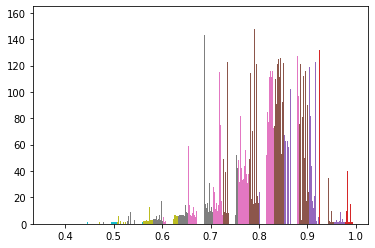

In [146]:
plt.hist(sim)
plt.show()

##### Vemos pelo histograma que a simiridade por requencia de palavras é relativamente alta. Isso não é nenhuma surpresa pois temos stopwords que são usadas em todos os textos, isso aproxima muito os documentos. Usando TFIDF devemos ter um resultado mais bem distribuido

#  Exercício 3: Usando o Gensim

In [147]:
from gensim import corpora, models, similarities
from nltk.corpus import stopwords
from nltk.stem.snowball import PortugueseStemmer
from collections import Counter
from string import punctuation

In [148]:
sw = stopwords.words('portuguese')+ list(punctuation)
stemmer = PortugueseStemmer()

In [149]:
textos_limpos = []
c = Counter([])
for texto in textos:
    tlimpo = [stemmer.stem(token.strip(punctuation).lower()) for token in WordPunctTokenizer().tokenize(texto) if token.lower() not in sw]
    c.update(tlimpo)
    textos_limpos.append(tlimpo)
textos_limpos = [[token for token in t if c[token]>1 and token != "\x97"] for t in textos_limpos]

In [150]:
dicionario = corpora.Dictionary(textos_limpos)
dicionario.save('vocabulario.dict')
print(dicionario)

Dictionary(17948 unique tokens: ['', '10', '11', '15', '186']...)


In [151]:
corpus = [dicionario.doc2bow(d) for d in textos_limpos]

#  Exercício 4: Indexação Semântica Latente.

In [152]:
mod_tfidf = models.TfidfModel(corpus)
corpus_tfidf = mod_tfidf[corpus]

In [153]:
mod_lsi = models.LsiModel(corpus_tfidf, id2word=dicionario, num_topics=200)
corpus_lsi = mod_lsi[corpus_tfidf]

In [155]:
mod_lsi.print_topics(5)

[(0,
  '0.123*"sr" + 0.105*"poet" + 0.084*"luís" + 0.074*"crític" + 0.068*"\x93" + 0.068*"vers" + 0.066*"dramát" + 0.066*"camil" + 0.065*"autor" + 0.063*"jos"'),
 (1,
  '0.187*"luís" + -0.173*"crític" + -0.157*"sr" + 0.151*"camil" + -0.146*"poet" + -0.136*"dramát" + -0.129*"alenc" + -0.110*"poes" + -0.104*"autor" + 0.097*"henriquet"'),
 (2,
  '-0.391*"luís" + 0.284*"henriquet" + -0.168*"tit" + -0.166*"marcelin" + -0.153*"daniel" + -0.148*"carlot" + -0.147*"alves" + -0.143*"albert" + -0.135*"jorg" + -0.115*"poet"'),
 (3,
  '0.789*"henriquet" + 0.311*"juliã" + 0.151*"renan" + 0.105*"elis" + 0.090*"fernandinh" + 0.082*"pimentel" + 0.079*"veig" + 0.070*"jorg" + 0.062*"crític" + -0.058*"exci"'),
 (4,
  '-0.611*"cecíl" + 0.381*"luís" + 0.165*"alves" + -0.150*"carlot" + -0.145*"venânci" + 0.124*"camil" + -0.113*"magalhã" + -0.112*"tibúrci" + -0.106*"mendonc" + -0.104*"juvênci"')]